In [1]:
from numqt import *

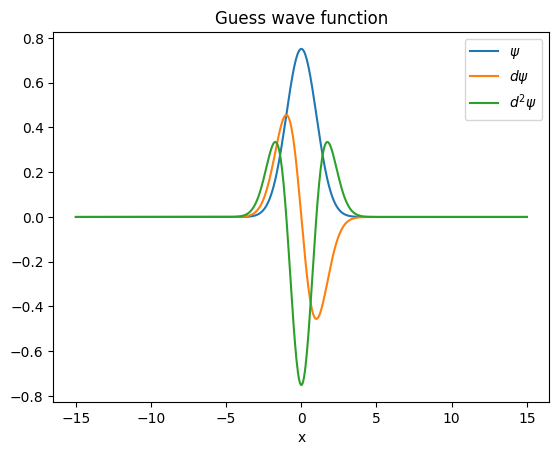

In [2]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 1 # Characteristic length along x

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1
m = 1 # e-mass
wx = hbar / (m * Lx**2) # x confinement frequency

#-----------------------------------------------------------
# Simulation parameters
#-----------------------------------------------------------
xbounds = (-15*Lx, 15*Lx) # 10 times the confinement length
dx = 0.05 # spacing
nx = int(np.abs(xbounds[1] - xbounds[0]) / dx)

#-----------------------------------------------------------
# Creating grid
#-----------------------------------------------------------
mesh_obj = Mesh(dims=1,
                 xbounds=xbounds,
                 nx=nx)

dimx = mesh_obj.Nx
#-----------------------------------------------------------
# Guess basis
#-----------------------------------------------------------
N_states = 50
psi_fn = lambda n, mesh: ho_state(n, mesh, omega = wx, mass = m, hbar = hbar)
basis = (psi_fn, N_states)
for i in range(3):
    plt.plot(mesh_obj.mesh_x, psi_fn(0, mesh_obj.mesh_x)[i], label = [r"$\psi$", r"$d\psi$", r"$d^2\psi$"][i])
plt.xlabel("x")
plt.title("Guess wave function")
plt.legend()

In [3]:
#-----------------------------------------------------------
# Obtaining canonical operators
#-----------------------------------------------------------
operators = canonic_ops(mesh_obj, basis = basis, ops_to_compute = ["p2", "x2"], additional_subspaces = None, hbar=1)
px2 = operators.get_ops()["p2"]
x2 = operators.get_ops()["x2"]

#-----------------------------------------------------------
# Constructing the Hamiltonian
#-----------------------------------------------------------
H = Hamiltonian(px2 / (2*m) + 0.5 * m * x2 * wx**2, mesh_obj, basis = basis)

In [4]:
k = N_states - 2
energies, wavefunctions = H.solve(k)

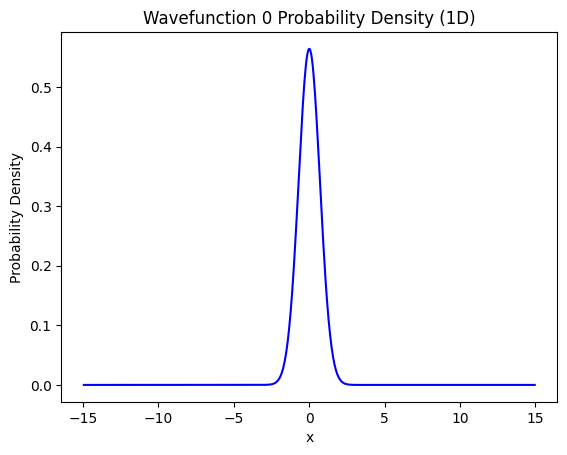

In [5]:
H.plot(0)

Text(0.5, 0, 'n')

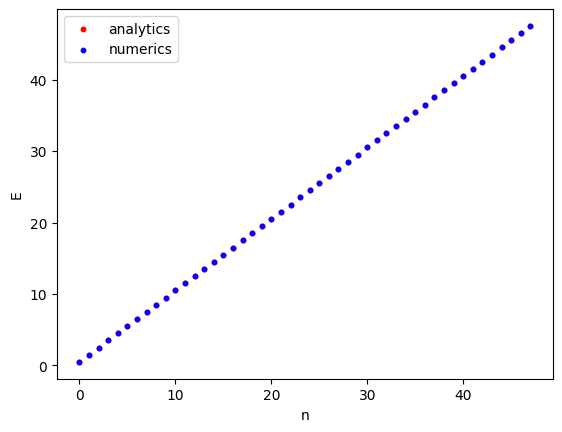

In [6]:
plt.scatter(range(0, k), [hbar * wx *(n + 0.5) for n in range(0, k)], c="r", s = 10, label = "analytics")
plt.scatter(range(0, k), sorted(energies), c="b", s = 10, label = "numerics")
plt.legend()
plt.ylabel("E")
plt.xlabel("n")